In [1]:
from keras import backend as K
import time
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Importing NumPy (Numerical Python) which is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It also gives an alias to the library.
import numpy as np

% matplotlib inline
np.random.seed(2017)

from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.callbacks import Callback
# Importing the callbacks of Keras.
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### The model above shows some amount of overfitting and this would require some kind of regularization.
### Re-Running the model with below changes 
1. Using Image Normalization
2. Making use of Batch Normalization
3. Making use of L2 Regularizer
4. Properly using Dropout
5. Removed Dense layers
6. Overall reduced number of parameters from 1,172,410 to 290,090

### Results: Achieved a better accuracy of 84.33 % in just 15th Epoch. Ran the model further and achieved 86.36 % in 45th Epoch & 87.53 % in 89th Epoch

In [4]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

170500096/170498071 [==============================] - 2s 0us/step
Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) 0.013107389 1.0013419
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
num_train, img_rows, img_cols,img_channels =  testX.shape
num_test, _, _, _ =  testX.shape
num_classes = len(np.unique(testy))

In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))

W0717 17:00:37.972431 140461394380672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
W0717 17:00:38.034118 140461394380672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 17:00:38.042265 140461394380672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 17:00:38.101593 140461394380672 deprecation_wrapper.py

In [9]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

W0717 17:00:42.139605 140461394380672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
__________

### Total params: 455,370

#LEARNING RATE FINDER

In [0]:
class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

#ADDING CUTOUT

In [12]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py

from random_eraser import get_random_eraser

--2019-07-17 17:00:46--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py’

random_eraser.py    100%[===================>]     888  --.-KB/s    in 0s      

2019-07-17 17:00:46 (118 MB/s) - ‘random_eraser.py’ saved [888/888]



In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

#FINDING THE OPTIMUM LEARNING RATE

In [14]:
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/16))
model1.fit(X_train, Y_train, callbacks=[lr_finder])

W0717 17:00:47.507320 140461394380672 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
50000/50000 [==============================] - 68s 1ms/step - loss: 1.9719 - acc: 0.3219


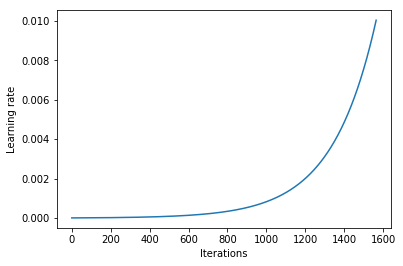

In [15]:
lr_finder.plot_lr()

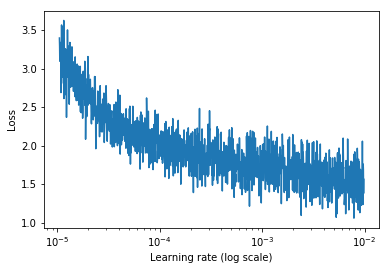

In [16]:
lr_finder.plot()

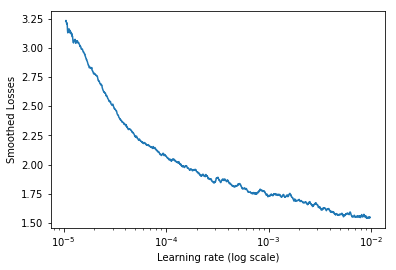

In [17]:
lr_finder.plot_smoothed_loss()

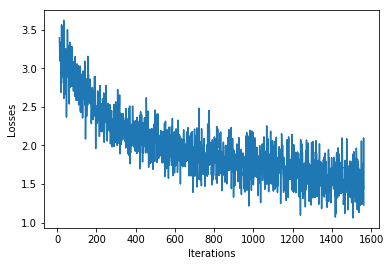

In [18]:
lr_finder.plot_loss()

#RUNNING LR FINDER FOR THE SECOND TIME

In [19]:
lr_finder = LR_Finder(start_lr=5e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/16))
model1.fit(X_train, Y_train, callbacks=[lr_finder])

Epoch 1/1
50000/50000 [==============================] - 66s 1ms/step - loss: 1.4178 - acc: 0.5186


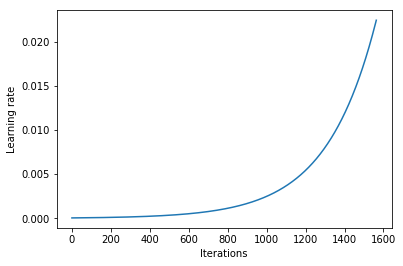

In [20]:
lr_finder.plot_lr()

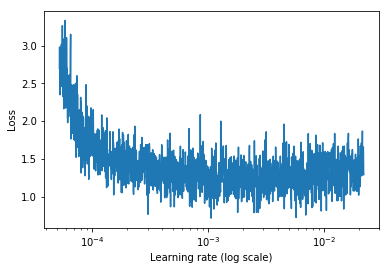

In [21]:
lr_finder.plot()

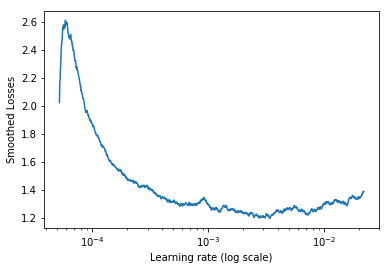

In [22]:
lr_finder.plot_smoothed_loss()

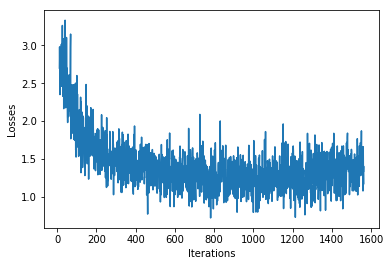

In [23]:
lr_finder.plot_loss()

#RUNNING LR FINDER FOR THE THIRD TIME

In [24]:
lr_finder = LR_Finder(start_lr=1e-4, end_lr=1e-1, step_size=np.ceil(X_train.shape[0]/16))
model1.fit(X_train, Y_train, callbacks=[lr_finder])

Epoch 1/1
50000/50000 [==============================] - 66s 1ms/step - loss: 1.2367 - acc: 0.5887


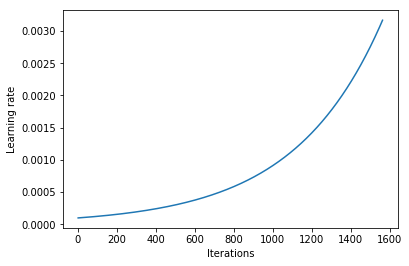

In [25]:
lr_finder.plot_lr()

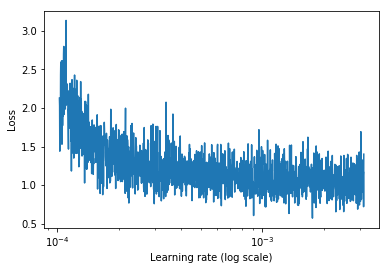

In [26]:
lr_finder.plot()

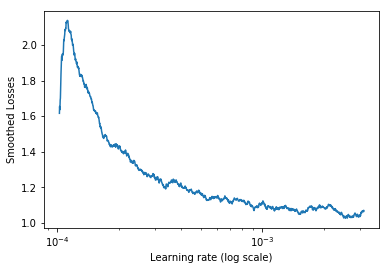

In [27]:
lr_finder.plot_smoothed_loss()

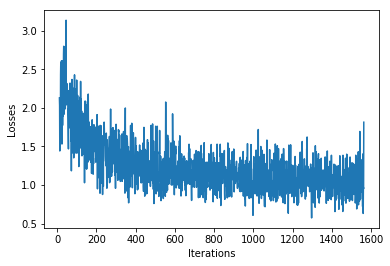

In [28]:
lr_finder.plot_loss()

#RUNNING LR FINDER FOR THE FOURTH TIME

In [29]:
lr_finder = LR_Finder(start_lr=1e-3, end_lr=1e-1, step_size=np.ceil(X_train.shape[0]/16))
model1.fit(X_train, Y_train, callbacks=[lr_finder])

Epoch 1/1
  128/50000 [..............................] - ETA: 2:19 - loss: 1.1098 - acc: 0.6094

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182190). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 65s 1ms/step - loss: 1.0041 - acc: 0.6630


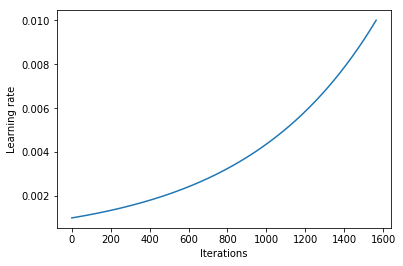

In [30]:
lr_finder.plot_lr()

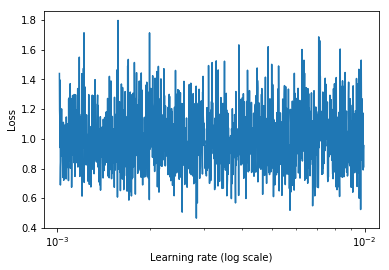

In [31]:
lr_finder.plot()

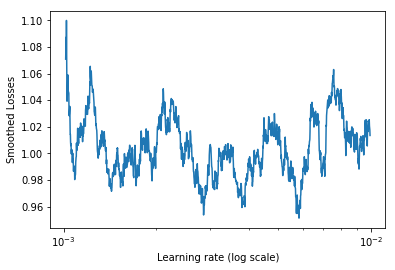

In [32]:
lr_finder.plot_smoothed_loss()

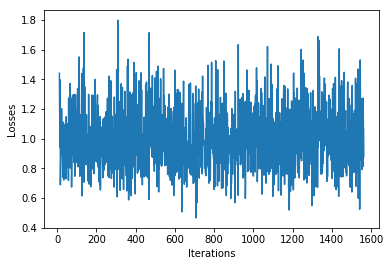

In [33]:
lr_finder.plot_loss()

#OPTIMAL LEARNING RATE IS "8e-3".

In [0]:
K.set_value(model1.optimizer.lr, 8e-3)

#REDEFINING SGD WITH OPTIMAL LEARNING RATE

In [0]:
#sgd = SGD(lr=1e-2, momentum=0.9)

# Compile the model
#model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Mounting the Google Drive to save the weights
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/Assignment11:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

#TRAIN THE MODEL WITH THE OPTIMAL LEARNING RATE

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=391.0, validation_data=(array([[[..., verbose=0, callbacks=[<keras.ca..., epochs=100)`
  import sys



Epoch 00001: val_acc improved from -inf to 0.73730, saving model to /content/gdrive/My Drive/Assignment11:001-val_acc:0.737.hdf5

Epoch 00002: val_acc improved from 0.73730 to 0.75700, saving model to /content/gdrive/My Drive/Assignment11:002-val_acc:0.757.hdf5

Epoch 00003: val_acc improved from 0.75700 to 0.77350, saving model to /content/gdrive/My Drive/Assignment11:003-val_acc:0.774.hdf5

Epoch 00004: val_acc did not improve from 0.77350

Epoch 00005: val_acc improved from 0.77350 to 0.78310, saving model to /content/gdrive/My Drive/Assignment11:005-val_acc:0.783.hdf5

Epoch 00006: val_acc improved from 0.78310 to 0.78890, saving model to /content/gdrive/My Drive/Assignment11:006-val_acc:0.789.hdf5

Epoch 00007: val_acc improved from 0.78890 to 0.80030, saving model to /content/gdrive/My Drive/Assignment11:007-val_acc:0.800.hdf5

Epoch 00008: val_acc did not improve from 0.80030

Epoch 00009: val_acc did not improve from 0.80030

Epoch 00010: val_acc did not improve from 0.80030



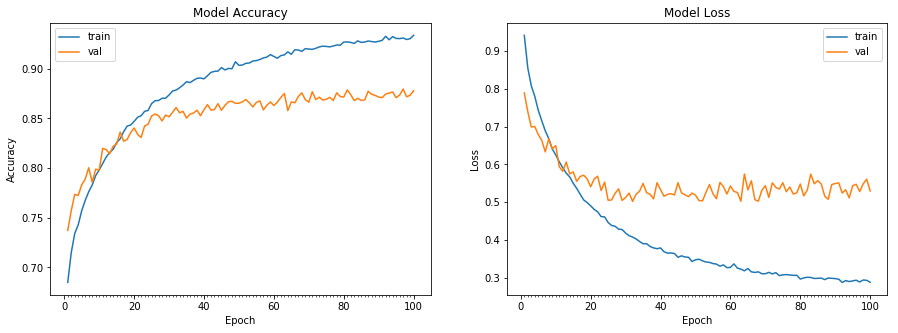

Accuracy on test data is: 87.78


In [38]:
# train the model
start = time.time()
# Train the model

model_info = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 steps_per_epoch = np.ceil(X_train.shape[0]/128), nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), verbose=0,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model1))

#BEST ACCURACY IS "**87.95%**" AT 97TH EPOCH.

BEST ACCURACY IS "**88.4%**" AT 83RD EPOCH WITH **LR=1E-2**.

In [0]:
#Loading the best weights for prediction
model1.load_weights('/content/gdrive/My Drive/Assignment11:097-val_acc:0.880.hdf5')
#model1.load_weights('/content/gdrive/My Drive/Assignment11:083-val_acc:0.884.hdf5')

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [0]:
#Function to get actual class names
def getClassName(classNumber):
  for i in range(len(class_names)):
    if(classNumber == i):
      className = class_names[i]
  return className

#FIND MISCLASSIFIED IMAGES

In [0]:
def findMisclassifiedImages():
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  # Pixel normalization for test images
  test_features = test_features.astype('float32')/255

  y_pred = model1.predict(test_features)
  y_pred = np.argmax(y_pred, axis=1)
  
  # Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  test_labels = test_labels.reshape(test_labels.shape[0],)
  
  incorrect = np.nonzero(y_pred != test_labels)
  
  top_incorrect = incorrect[0][0:25]
  
  result = [{"Predicted_Values": y_pred, "Misclassified_Images": top_incorrect}]
  
  return result

In [0]:
incorrect_images = findMisclassifiedImages()

In [0]:
top_incorrect = incorrect_images[0]['Misclassified_Images']

In [0]:
y_pred = incorrect_images[0]['Predicted_Values']

In [0]:
def plotMisclassifiedImages(misclassifiedImages, predictedValues):
  # Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  fig = plt.figure(figsize = (25,25)) 
  plots = []
  count = 0
  for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((10,10), (i,j))
        plt.imshow(test_features[misclassifiedImages[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        fig.suptitle('25 Misclassified Images (Actual/Predicted Labels)', fontsize = 20)
        plt.title("{}, {}".format(getClassName(test_labels[misclassifiedImages[count]]), getClassName(predictedValues[misclassifiedImages[count]])))
        count = count+1
  plt.show()

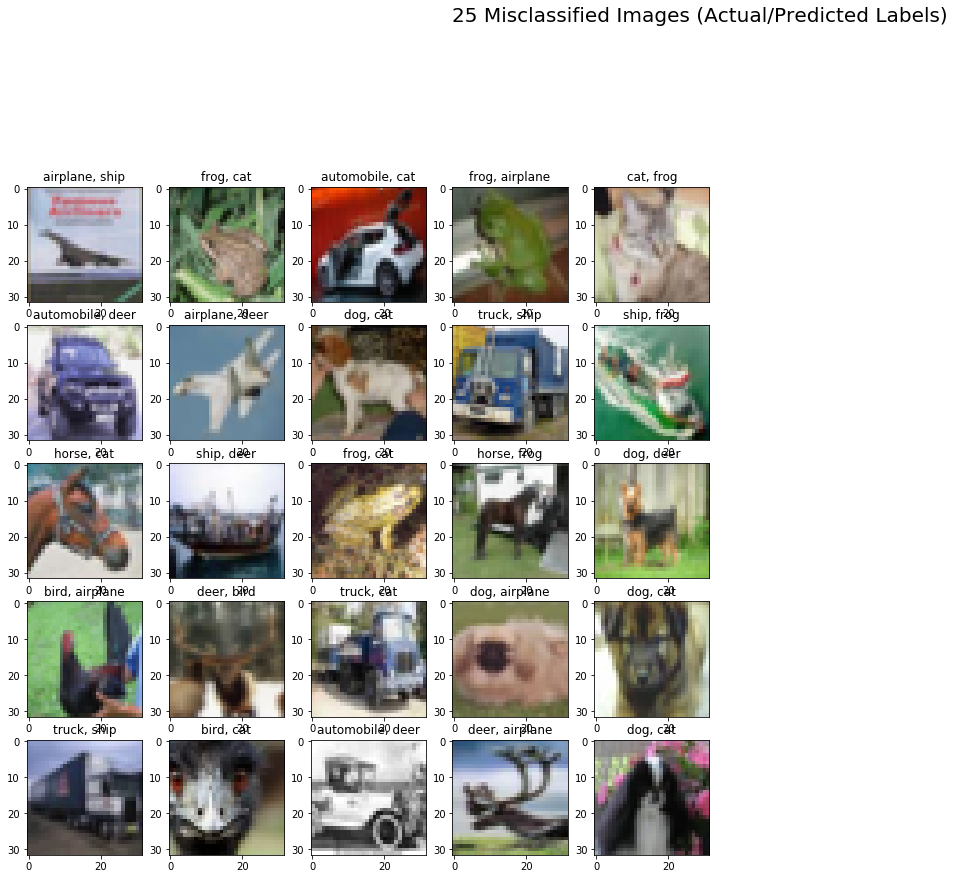

In [48]:
plotMisclassifiedImages(top_incorrect, y_pred)

#GRADCAM ON MISCLASSIFIED IMAGES

In [0]:
#Function to plot original image and GradCAM image
def plotOrigGradCam(top_incorrect):
  k = 0
  
  for i in range(5):
    for j in range(5):
      (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

      # Pixel normalization for test images
      test_features = test_features.astype('float32')/255

      # convert class labels to binary class labels
      test_labels = np_utils.to_categorical(test_labels, num_classes)

      img = test_features[top_incorrect[k]]
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      #x = preprocess_input(x)

      preds = model1.predict(x)
      class_idx = np.argmax(preds[0])
      class_output = model1.output[:, class_idx]
      last_conv_layer = model1.get_layer("conv2d_9")

      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([model1.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([x])
      for m in range(10):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[m]

      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)

      (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

      img = test_features[top_incorrect[k]]
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

      fig = plt.figure(figsize = (14,40)) 
      sub = fig.add_subplot(10, 5, (k + 1))
      vis = np.concatenate((img, superimposed_img), axis=0)
      sub.imshow(vis, interpolation='bilinear')
      plt.title("Original: " + getClassName(test_labels[top_incorrect[k]])+"    Predicted: " + getClassName(class_idx))
      k += 1

      cv2.waitKey(0)
  

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

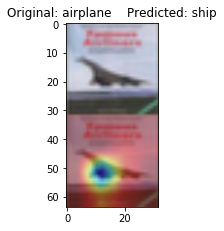

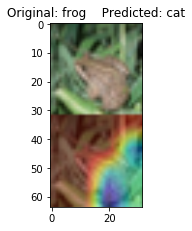

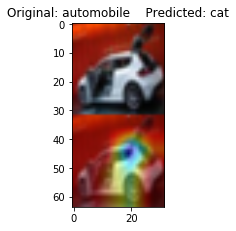

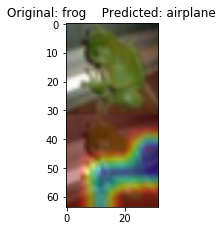

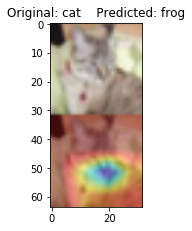

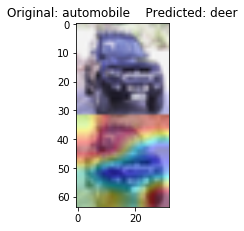

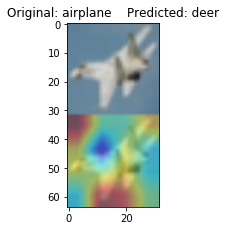

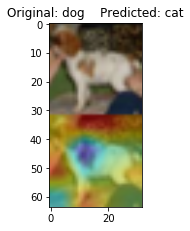

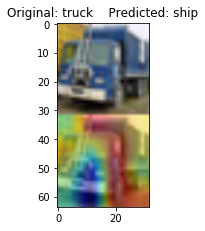

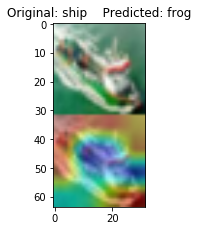

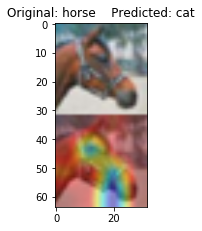

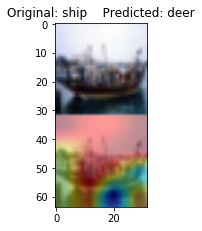

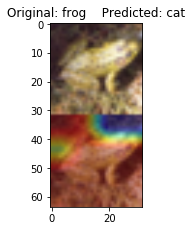

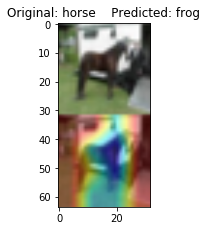

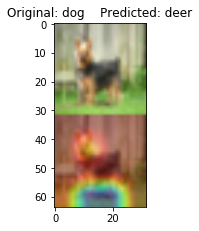

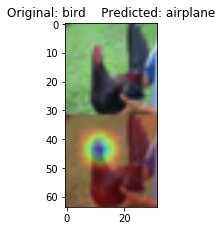

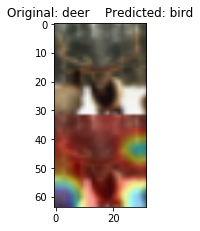

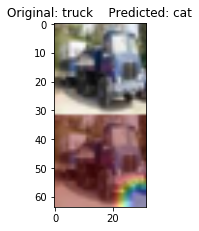

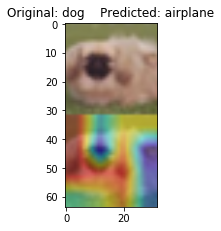

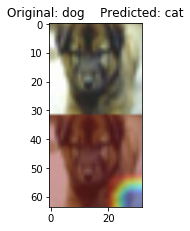

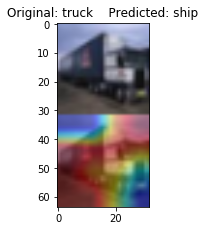

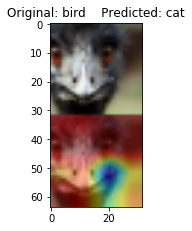

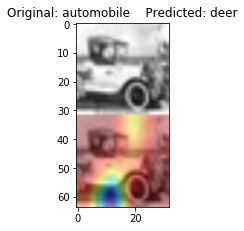

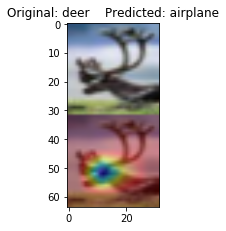

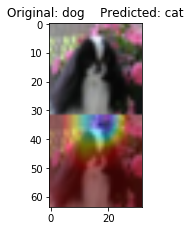

In [69]:
#Running a loop to plot original and GradCAM image for all the selected images  
plotOrigGradCam(top_incorrect)